In [38]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heights.csv")
df.tail()

,name,height
15,johnson,6.5
16,donald,6.6
17,aamir,7.1
18,ken,7.1
19,Liu,40.2


In [4]:
Q1,Q3=df["height"].quantile([0.25,0.75])
Q1,Q3

(5.3500000000000005, 6.275)

In [5]:
IQR=Q3-Q1
IQR

0.9249999999999998

In [6]:
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower,upper

(3.962500000000001, 7.6625)

In [7]:
df[(df["height"]<lower) | (df["height"]>upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [10]:
df_new=df[(df["height"]>lower) & (df["height"]<upper)]
df_new.head()

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4


In [11]:
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [18]:
df.Sales.unique()

array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
       37279, 21388, 21896,  9665, 10297, 11079, 13410, 11229, 15352,
       13286, 11470, 11873, 23000, 12215, 14895, 30247, 29284, 27904,
       23407, 23716, 25077, 33649, 24560, 34102, 28257, 30691, 29387],
      dtype=int64)

In [40]:
labels=df.Region.unique()

In [22]:
grouping=df.groupby("Region")

In [35]:
plots=[group["Sales"].to_numpy() for _,group in grouping] # to_numpy() or values

In [36]:
plots

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64)]

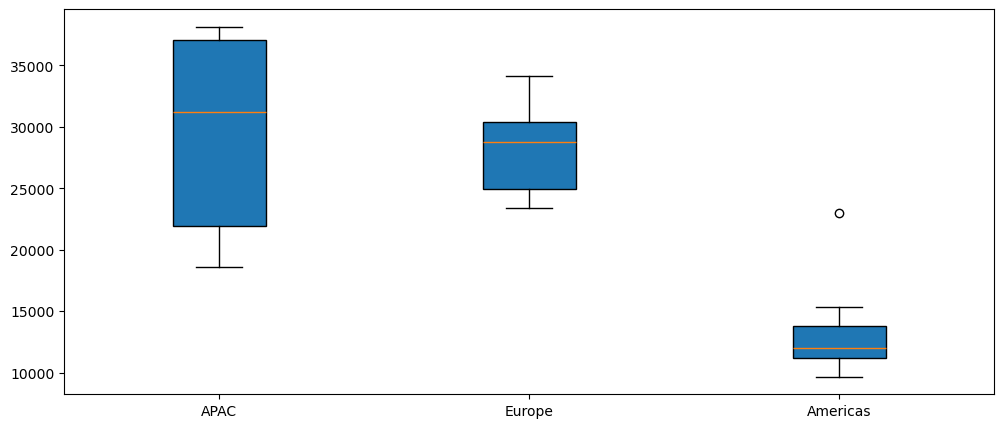

In [47]:
plt.figure(figsize=(12,5))
plt.boxplot(plots,tick_labels=labels,vert=True,patch_artist=True)
plt.show()